In [218]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [219]:
df = sns.load_dataset('tips')

In [21]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
df['tip_rate'] = df['tip'] / df['total_bill']

In [23]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


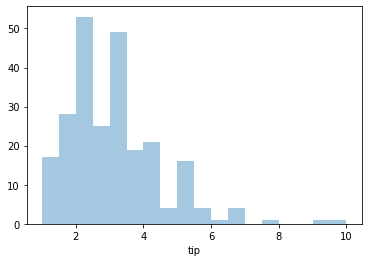

In [26]:
sns.distplot(df['tip'], kde=False)

## 分散

In [18]:
np.var(df['tip'])

1.9066085124966428

## 標準偏差

In [25]:
np.std(df['tip'])

1.3807999538298958

In [27]:
tip_mean = df['tip'].mean()
tip_mean

2.9982786885245902

## 共分散

In [29]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [31]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)

In [32]:
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [33]:
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## 連関

In [46]:
cont_table = pd.crosstab(df['sex'], df['time'])
cont_table

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [42]:
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

In [45]:
a =2
b =3
min(a,b)

2

## クラメールの連関係数

In [50]:
def cramers_v(x,y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n     = len(x)
    v = np.sqrt(chi2 / (min_d * n))
    return v

In [51]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

## 標本分布

In [80]:
m = 100
n = 50
column = 'tip'
sample_means = [] 
for i in range(m):
    sampled_df = df.sample(n)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

In [82]:
# 平均
np.mean(sample_means)

3.0070200000000007

In [85]:
df[column].mean()

2.9982786885245902

In [86]:
# 分散
np.var(sample_means)

0.038659150799999965

In [88]:
# 母分散
np.var(df[column])/n

0.03813217024993285

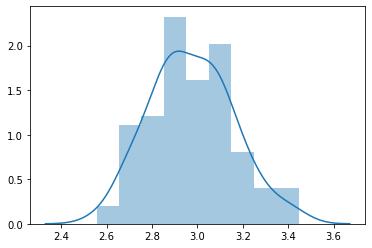

In [76]:
sns.distplot(sample_means)

## 不偏分散

In [92]:
# stas.tvar(a)
# np.var(a, ddof=1)
# stats.tstd(a)
# np.std(a, ddof=1)

In [90]:
stats.tvar(df['tip'])

1.914454638062471

In [91]:
np.var(df['tip'], ddof=1)

1.9144546380624725

## 不偏分散の普遍性

In [143]:
n = 50
m = 1000
sample_vars = []
sample_uvars = []
column = 'tip'
for i in range(m):
    sampled_df = df.sample(n)
    sample_var = np.var(sampled_df[column])
    sample_uvar = stats.tvar(sampled_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)

In [144]:
#　標本の分散の平均
np.mean(sample_vars)

1.86232636544

In [145]:
# 標本の不偏分散
np.mean(sample_uvars)

1.9003330259591837

In [146]:
# 母分散
np.var(df[column])

1.9066085124966428

## 比率の区間推定

In [147]:
#stats.binom.interval(alpha, n, p)

In [151]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [152]:
# ↑ 57% ~ 63% の信頼区間

In [167]:
n = 50
m = 100
alpha = 0.95
column = 'sex'
value  = 'Male'
population_male_ratio = len(df[df[column]== value]) / len(df)
results = []

for _ in range(m):
    sample_df = df.sample(n)
    male_ratio = len(sample_df[sample_df[column]==value]) / len(sample_df)
    min_num, max_num = stats.binom.interval(alpha, n, male_ratio)
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min': min_ratio, 'max': max_ratio, 'correct': correct})

In [168]:
result_df = pd.DataFrame(results)

In [169]:
result_df['correct'].value_counts()

True     97
False     3
Name: correct, dtype: int64

## 平均の区間推定

In [189]:
n = 50
m = 100
column = 'tip'
alpha = 0.95
population_mean = df[column].mean()
results = []
for _ in range(m):
    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var))
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max': max_val, 'correct': correct})

In [192]:
result_df = pd.DataFrame(result)

In [193]:
result_df['correct'].value_counts()

True    100
Name: correct, dtype: int64

## t分布

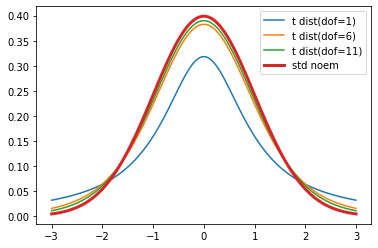

In [199]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x) #標準正規分布

for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std noem", linewidth="3")
plt.legend()

## 平均の区間推定（正規分布 vs t分布）

In [213]:
column = 'tip'
alpha = 0.95
n = 50
poppulation_mean = df[column].mean() #正解値

sample_df = df.sample(n)
sample_mean = sample_df[column].mean()
sample_var = stats.tvar(sample_df[column]) #不偏分散
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)

In [201]:
sample_var

3.4952489795918362

In [205]:
poppulation_mean

2.9982786885245902

In [206]:
sample_mean

3.4120000000000004

In [214]:
print(min_val_norm, max_val_norm)

2.7292439452596526 3.6959560547403485


In [215]:
print(min_val_t, max_val_t)

2.71700907858082 3.708190921419181


## 比率差の検定

In [221]:
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

## 連関の検定（カイ2乗検定）

In [228]:
obs = [[15, 5], [15, 65]]
stats.chi2_contingency(obs, correction=False)

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

## Z検定とカイ2乗検定

In [245]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)
count1 = sample_df1['time'].value_counts()['Dinner']
count2 = sample_df2['time'].value_counts()['Dinner']
proportions_ztest([count1, count2], [n, n], alternative='two-sided')

(1.5426587495244097, 0.12291359546960373)

In [246]:
count1

39

In [247]:
sample_freq1 = sample_df1['time'].value_counts().values
sample_freq2 = sample_df2['time'].value_counts().values

In [248]:
# カイ2乗検定
# obs = [15, 5], [15, 65]]
stats.chi2_contingency([sample_freq1, sample_freq2], correction=False)

(2.3797960174842157,
 0.12291359546960405,
 1,
 array([[35.5, 14.5],
        [35.5, 14.5]]))